* Function transformer is used to make the data normally distributed because if the data is normally distributed then it forms a normal distribution and most of the ML algorithms work and give very good results on Normal Distributions.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [6]:
df.head(2)

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
X = df.drop('Survived', axis = 1)

In [21]:
X.head(1)

Age  Fare
0  22.0  7.25

In [22]:
y = df['Survived']

In [23]:
y.head(1)

0    0
Name: Survived, dtype: int64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10,stratify=y)

In [25]:
X_train.shape

(623, 2)

In [26]:
df.shape

(891, 3)

In [27]:
y_train.shape

(623,)

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


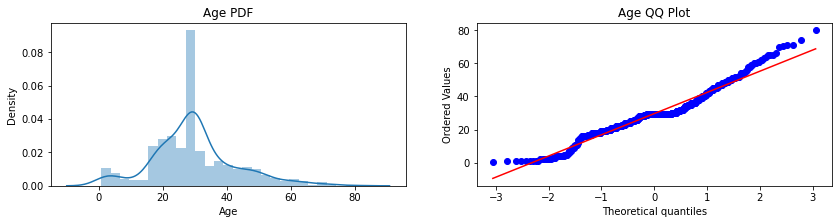

In [34]:
## now we will check whether the two numerical columns - age and fare are normally distributed or not-

plt.figure(figsize = (14,3))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
st.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


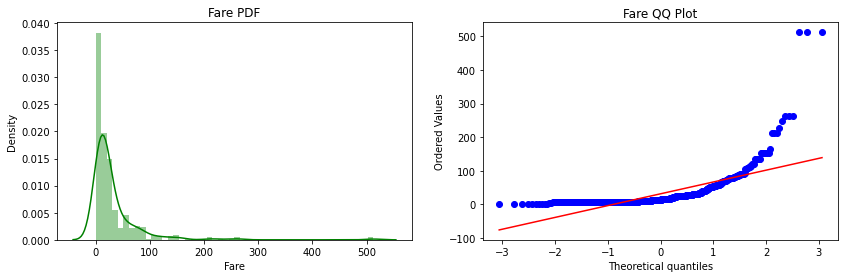

In [36]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'], color = 'green')
plt.title('Fare PDF')

plt.subplot(122)
st.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQ Plot')

plt.show()

In [37]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [39]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
clf1.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred1 = clf1.predict(X_test)

In [42]:
y_pred2 = clf2.predict(X_test)

In [43]:
print('Accuracy score of Logistic Regression is ', accuracy_score(y_test,y_pred1))

Accuracy score of Logistic Regression is  0.667910447761194


In [44]:
print(f'Accuracy score of Decision Tree Classifier is {accuracy_score(y_test,y_pred2)}')

Accuracy score of Decision Tree Classifier is 0.6380597014925373


In [45]:
ft = FunctionTransformer(np.log1p)

In [46]:
X_train_transformed = ft.fit_transform(X_train)

In [47]:
X_test_transformed = ft.fit_transform(X_test)

In [48]:
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [49]:
clf1.fit(X_train_transformed,y_train)

LogisticRegression()

In [50]:
y_pred3 = clf1.predict(X_test_transformed)

In [51]:
y_pred4 = clf2.predict(X_test_transformed)

In [52]:
print(f'Accuracy score of Decision Tree Classifier is {accuracy_score(y_test,y_pred4)}')

Accuracy score of Decision Tree Classifier is 0.6529850746268657


In [54]:
print(f'Accuracy score of Logistic Regression is {accuracy_score(y_test,y_pred3)}')

Accuracy score of Logistic Regression is 0.6380597014925373


In [55]:
X_transformed = ft.fit_transform(X)

In [56]:
clfL = LogisticRegression()

In [57]:
clfD = DecisionTreeClassifier()

In [58]:
print('LR', np.mean(cross_val_score(clfL,X_transformed,y,scoring='accuracy', cv=10)))

LR 0.678027465667915


In [59]:
print('DT', np.mean(cross_val_score(clfD,X_transformed,y,scoring='accuracy', cv=10)))

DT 0.6599500624219725


C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


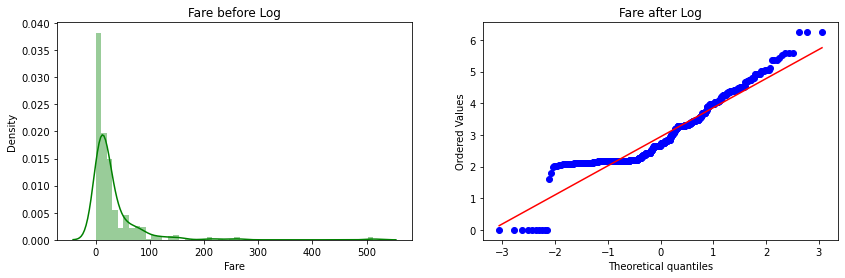

In [61]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'], color = 'green')
plt.title('Fare before Log')

plt.subplot(122)
st.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title('Fare after Log')

plt.show()

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


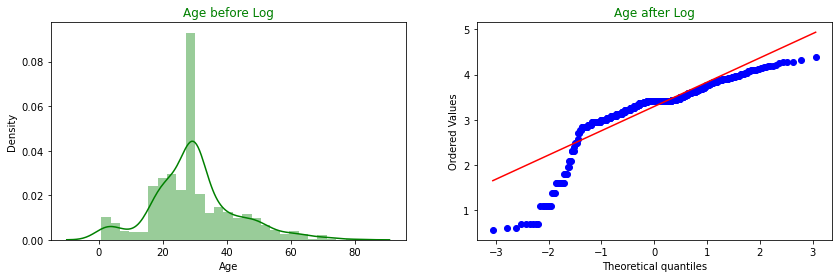

In [69]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'], color = 'green')
plt.title('Age before Log', color = 'green')

plt.subplot(122)
st.probplot(X_train_transformed['Age'], dist = 'norm', plot = plt)
plt.title('Age after Log' , color = 'green')

plt.show()